In [1]:
#NB: You need to install pytorch 
#!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu118
#!pip install sentence-transformers
#!pip install umap
#!pip install umap-learn
#!pip install hdbscan
#!pip install umap-learn
#!pip install -U feel-it

In [2]:
import pandas as pd
from sentence_transformers import SentenceTransformer  
import hdbscan     #necessary per clustering
import matplotlib.pyplot as plt
import numpy as np
import re
from sklearn.feature_extraction.text import CountVectorizer
import umap.umap_ as umap #necessary for dimensionality reduction

/tmp/ipykernel_15687/1216746457.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/home/wtto/Documents/Computational_Modeling/CompModVenv/lib/python3.11/site-packages/sentence_transformers/cross_encoder/CrossEncoder.py:11: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from tqdm.autonotebook import tqdm, trange


# READ INTO THE DATA

In [3]:
"""path = '/home/wtto/Documents/HHU/Second_Semester/Computational_Modeling/BN/deepsalviniUSALO.txt'   

# Read in the file 
with open(path, "r", encoding='utf-8') as f:
    tweets = f.readlines()"""

'path = \'/home/wtto/Documents/HHU/Second_Semester/Computational_Modeling/BN/deepsalviniUSALO.txt\'   \n\n# Read in the file \nwith open(path, "r", encoding=\'utf-8\') as f:\n    tweets = f.readlines()'

# EXTRACT TWEET CONTENT USING THE PROCESS FUNCTION

In [4]:
"""#function to extract tweet content discarding metadata
def preprocess(line):
    # Extract the text content after <matteosalvinimi>
    results = re.search(r'<matteosalvinimi>(.+)', line)
    if results:
        # Return the text content, which consists of the first group
        return results.group(1).strip()
    else:
        return None
    
#function call 
#the executed_tweets variable will contain the tweets without metadata
extracted_tweets = [preprocess(tweet) for tweet in tweets]

#this will be a document with all the tweets together
extracted_tweets_as_document = " ".join(extracted_tweets)"""

'#function to extract tweet content discarding metadata\ndef preprocess(line):\n    # Extract the text content after <matteosalvinimi>\n    results = re.search(r\'<matteosalvinimi>(.+)\', line)\n    if results:\n        # Return the text content, which consists of the first group\n        return results.group(1).strip()\n    else:\n        return None\n    \n#function call \n#the executed_tweets variable will contain the tweets without metadata\nextracted_tweets = [preprocess(tweet) for tweet in tweets]\n\n#this will be a document with all the tweets together\nextracted_tweets_as_document = " ".join(extracted_tweets)'

# SAVE EXTRACTED TWEETS TO CSV

In [5]:
"""extracted_tweets_as_document
# create a dataframe with the tweets

df = pd.DataFrame(extracted_tweets, columns=['tweet'])

#save the dataframe to a csv file
df.to_csv('tweets.csv', index=False)"""

"extracted_tweets_as_document\n# create a dataframe with the tweets\n\ndf = pd.DataFrame(extracted_tweets, columns=['tweet'])\n\n#save the dataframe to a csv file\ndf.to_csv('tweets.csv', index=False)"

In [6]:
#LOAD THE DATAFRAME
df = pd.read_csv('tweets.csv')

df

FileNotFoundError: [Errno 2] No such file or directory: 'tweets.csv'

In [ ]:
data = list(df['tweet'])

In [ ]:
df = pd.read_csv('tweets.csv')

df

,tweet
0,"Il “governo ammucchiata”, tutti insieme con PD..."
1,".@VittorioSgarbi: ""Verrà un tempo in cui Conte..."
2,🇮🇹🇮🇹🇮🇹 https://t.co/OO047uCKTN
3,"Un commosso addio a Roberto Brivio, artista in..."
4,Fiducia in questo Parlamento? NO Fiducia negli...
...,...
46419,Al mercato di via Ettore Ponti http://yfrog....
46420,Sl mercato di via de Guarnieri Milano...
46421,al mercato di via Osoppo a Milano. Se volete r...
46422,www.immaginami.it


# CREATE EMBEDDING REPRESENTATIONS

In [ ]:
"""model = SentenceTransformer('distilbert-multilingual-nli-stsb-quora-ranking')
#embeddings = model.encode(data, show_progress_bar=True) # you need to run this the first time, then you can load the embeddings from the file because we will save them in the next cell"""

"model = SentenceTransformer('distilbert-multilingual-nli-stsb-quora-ranking')\n#embeddings = model.encode(data, show_progress_bar=True) # you need to run this the first time, then you can load the embeddings from the file because we will save them in the next cell"

# SAVE/LOAD THE EMBEDDINGS

In [ ]:
#np.save('embeddings.npy', embeddings)   #save the embeddings to a file

embeddings = np.load('embeddings.npy')   #load the embeddings from a file

# INITIALIZE RANDOM SEED FOR REPRODUCIBILITY

In [ ]:
random_seed = 42

# UMAP - DIMENSIONALITY REDUCTION

In [ ]:
umap_embeddings = umap.UMAP(n_neighbors=15, 
                            n_components=5, 
                            metric='cosine',
                            random_state=random_seed).fit_transform(embeddings)

/home/wtto/Documents/Computational_Modeling/CompModVenv/lib/python3.11/site-packages/umap/umap_.py:1945: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(f"n_jobs value {self.n_jobs} overridden to 1 by setting random_state. Use no seed for parallelism.")


# HDBSCAN - CLUSTERING

In [ ]:
cluster = hdbscan.HDBSCAN(min_cluster_size=15,
                          metric='euclidean',                      
                          cluster_selection_method='eom').fit(umap_embeddings)

# DATA VISUALIZATION

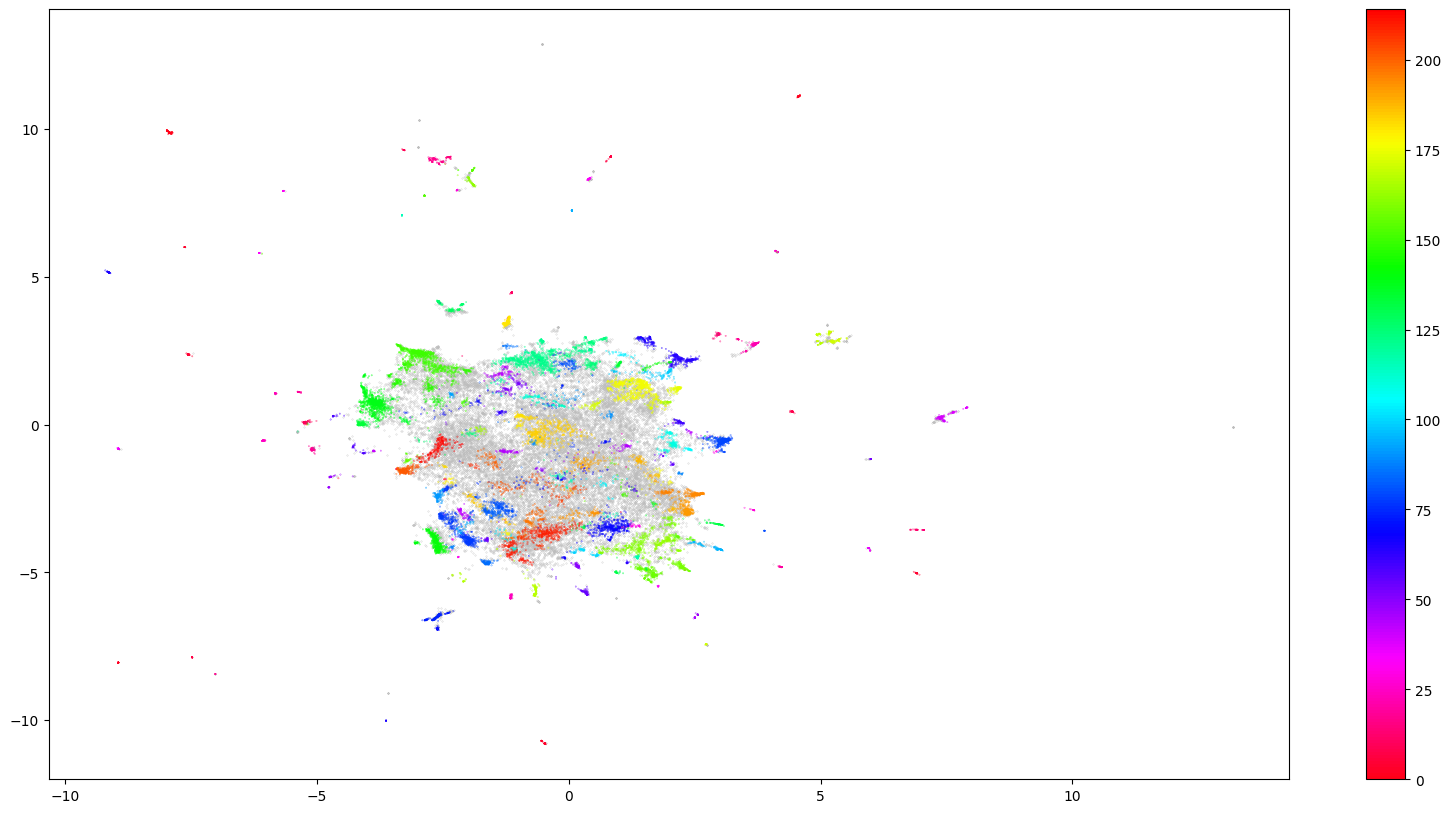

In [ ]:
# Prepare data
umap_data = umap.UMAP(n_neighbors=15, n_components=2, min_dist=0.0, metric='cosine').fit_transform(embeddings)
result = pd.DataFrame(umap_data, columns=['x', 'y'])
result['labels'] = cluster.labels_

# Visualize clusters
fig, ax = plt.subplots(figsize=(20, 10))
outliers = result.loc[result.labels == -1, :]
clustered = result.loc[result.labels != -1, :]
plt.scatter(outliers.x, outliers.y, color='#BDBDBD', s=0.05)
plt.scatter(clustered.x, clustered.y, c=clustered.labels, s=0.05, cmap='hsv_r')
plt.colorbar()

# CREATE TOPICS USING C-TF-IDF (CLASS BASED TF-IDF)

In [ ]:
#create df

docs_df = pd.DataFrame(data, columns=["Doc"])
docs_df['Topic'] = cluster.labels_
docs_df['Doc_ID'] = range(len(docs_df))

#merging the documents with the same topic
docs_per_topic = docs_df.groupby(['Topic'], as_index = False).agg({'Doc': ' '.join})

In [ ]:
# c_tf_idf function::
def c_tf_idf(documents, m, ngram_range=(1, 1)):
    count = CountVectorizer(ngram_range=ngram_range, stop_words= "english").fit(documents)
    t = count.transform(documents).toarray()
    w = t.sum(axis=1)
    tf = np.divide(t.T, w)
    sum_t = t.sum(axis=0)
    idf = np.log(np.divide(m, sum_t)).reshape(-1, 1)
    tf_idf = np.multiply(tf, idf)

    return tf_idf, count
  
# Compute tf_idf
tf_idf, count = c_tf_idf(docs_per_topic.Doc.values, m=len(data))

# INTERPRET THE TOPICS

In [ ]:
# Extract top n words per topic
def extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20):
    words = count.get_feature_names_out()
    labels = list(docs_per_topic.Topic)
    tf_idf_transposed = tf_idf.T
    indices = tf_idf_transposed.argsort()[:, -n:]
    top_n_words = {label: [(words[j], tf_idf_transposed[i][j]) for j in indices[i]][::-1] for i, label in enumerate(labels)}
    return top_n_words



# Extract topic sizes
def extract_topic_sizes(df):
    topic_sizes = (df.groupby(['Topic']).Doc.count().reset_index().rename({"Topic": "Topic", "Doc": "Size"}, axis='columns').sort_values("Size", ascending=False))
    return topic_sizes

# Get top words and topic sizes
top_n_words = extract_top_n_words_per_topic(tf_idf, count, docs_per_topic, n=20)
topic_sizes = extract_topic_sizes(docs_df)

In [ ]:
# LET’S LOOK AT THE 20 MOST FREQUENT TOPICS
topic_sizes.head(21)

,Topic,Size
0,-1,28366
151,150,907
139,138,861
123,122,816
177,176,552
78,77,508
70,69,484
185,184,470
80,79,435
142,141,423


# Code to Extract and Create a Dataframe of the 21 Most Frequent Topics

This code extracts the top 5 representative words for the 21 most frequent topics from the topic modeling results and creates a dataframe with columns for "Topic", "Size", and "Representative Words".

In [ ]:
most_frequent_topics = topic_sizes.head(21)

# Create a list to store data for the new dataframe
data = []

# Loop through the most frequent topics to get the representative words
for index, row in most_frequent_topics.iterrows():
    topic = row['Topic']
    size = row['Size']
    # Get the top 5 words for this topic
    top_words = top_n_words[topic][:5]
    # Concatenate the words with underscores
    representative_words = "_".join([word for word, _ in top_words])
    # Append the data to the list
    data.append([topic, size, representative_words])

# Create a new dataframe with the desired columns
df_topics = pd.DataFrame(data, columns=["Topic", "Size", "Representative Words"])



df_topics.to_csv("top_21_topics.csv", index=False)

# Display the dataframe
df_topics



,Topic,Size,Representative Words
0,-1,28366,che_la_il_non_salvini
1,150,907,tasse_pagare_le_fiscale_tax
2,138,861,europa_euro_salvini_europea_ue
3,122,816,immigrazione_immigrati_profughi_clandestina_sono
4,176,552,galera_carcere_detenuti_delinquenti_penitenziaria
5,77,508,roma_piazza_com_pic_twitter
6,69,484,pic_twitter_olio_latte_com
7,184,470,governo_salvini_non_il_che
8,79,435,scuola_insegnanti_scuole_azzolina_studenti
9,141,423,milano_milan_com_facebook_twitter


# Topics 122 (third most frequent) is about immigrants and immigration in general, topic 64 (the 13th most frequent) is about islam and terrorism and muslims, topic 81 (the 15th) is about immigrants landing in sicily and topic 123 (20th) is about NGOs and immigrants/immigration. We will extract the tweets from these topics and analyse them as being immigration-related tweets.

# convert for latex

In [ ]:
# Convert the dataframe to a LaTeX table and save it to a .tex file
latex_table = df_topics.to_latex(index=False)
with open("top_21_topics.tex", "w") as file:
    file.write(latex_table)

# Display the LaTeX code
latex_table

'\\begin{tabular}{rrl}\n\\toprule\nTopic & Size & Representative Words \\\\\n\\midrule\n-1 & 28366 & che_la_il_non_salvini \\\\\n150 & 907 & tasse_pagare_le_fiscale_tax \\\\\n138 & 861 & europa_euro_salvini_europea_ue \\\\\n122 & 816 & immigrazione_immigrati_profughi_clandestina_sono \\\\\n176 & 552 & galera_carcere_detenuti_delinquenti_penitenziaria \\\\\n77 & 508 & roma_piazza_com_pic_twitter \\\\\n69 & 484 & pic_twitter_olio_latte_com \\\\\n184 & 470 & governo_salvini_non_il_che \\\\\n79 & 435 & scuola_insegnanti_scuole_azzolina_studenti \\\\\n141 & 423 & milano_milan_com_facebook_twitter \\\\\n209 & 348 & live_https_videos_salviniofficial_facebook \\\\\n160 & 326 & su_diretta_rete_sarò_compagnia \\\\\n157 & 295 & rai_su_tre_diretta_uno \\\\\n64 & 279 & isis_islam_islamico_islamici_terroristi \\\\\n192 & 261 & amici_buona_buongiorno_buon_buonanotte \\\\\n81 & 251 & sicilia_palermo_siciliani_clandestini_immigrati \\\\\n194 & 240 & twitter_pic_com_26maggiovotolega_grazie \\\\\n201 & 2

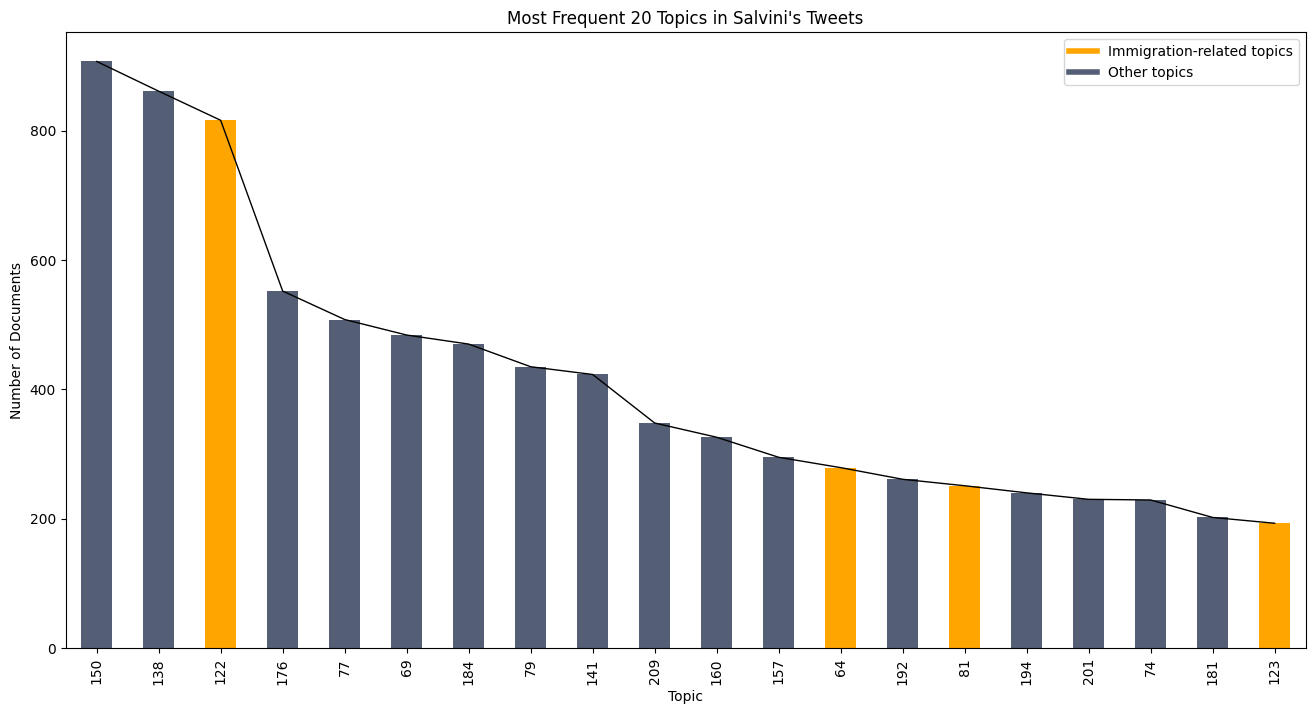

In [ ]:
# Filter out the first topic (-1)
filtered_topic_sizes = topic_sizes[topic_sizes['Topic'] != -1]

# Define colors for specific topics
colors = ['#545E75' if topic not in [122, 64, 81, 123] else 'orange' for topic in filtered_topic_sizes['Topic']]

# Plot
fig, ax = plt.subplots(figsize=(16, 8))
bars = filtered_topic_sizes.head(20).plot(kind='bar', x='Topic', y='Size', ax=ax, color=colors, legend=False)

# Collect the x and y coordinates of the top of each bar
x_coords = [bar.get_x() + bar.get_width() / 2 for bar in bars.patches]
y_coords = [bar.get_height() for bar in bars.patches]

# Add a line connecting the tops of the bars
ax.plot(x_coords, y_coords, 'k-', linewidth=1)

# Add a legend
custom_lines = [plt.Line2D([0], [0], color='orange', lw=4),
                plt.Line2D([0], [0], color='#545E75', lw=4)]
ax.legend(custom_lines, ['Immigration-related topics', 'Other topics'])

ax.set_ylabel('Number of Documents')
ax.set_title('Most Frequent 20 Topics in Salvini\'s Tweets')

plt.show()
                        

In [ ]:
#save the plot an image for latex
fig.savefig('topics.png') #save the plot as an image



In [ ]:
top_n_words[122][:20]   # 122 is the 3rd most common topic and it's about IMMIGRATION

[('immigrazione', 0.06593808687283396),
 ('immigrati', 0.05967627289453998),
 ('profughi', 0.03146883400941333),
 ('clandestina', 0.025534494928893117),
 ('sono', 0.025312028124171757),
 ('salvini', 0.023171249701097442),
 ('italiani', 0.02119737994604007),
 ('che', 0.02002688541523417),
 ('non', 0.019738254700966774),
 ('gli', 0.01865900475940929),
 ('il', 0.0170244164879271),
 ('italia', 0.01701259556701887),
 ('clandestini', 0.016278892546367326),
 ('migranti', 0.015912918649225016),
 ('dell', 0.0159082962297108),
 ('di', 0.013706316464140668),
 ('da', 0.01367614559988766),
 ('solo', 0.013110644532554661),
 ('senza', 0.012572789169759737),
 ('business', 0.012508918602552918)]

# WordCloud 

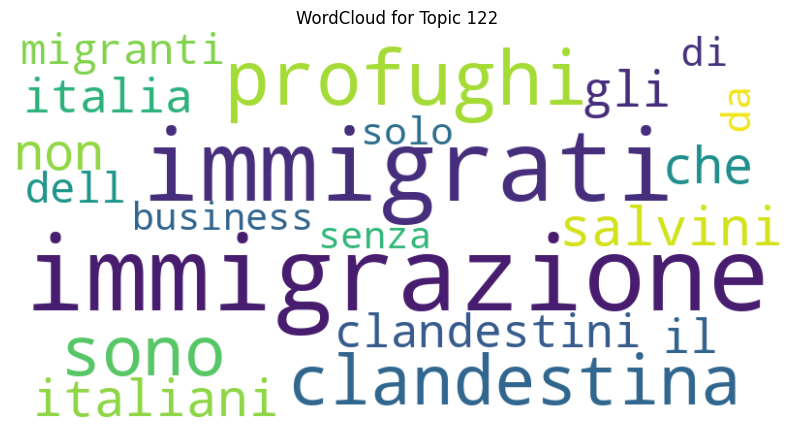

In [ ]:
#!pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have already extracted top_n_words and topic_sizes
top_n_words_122 = top_n_words[122]  # Replace 122 with your actual topic number

# Extract words and their TF-IDF scores
words_122 = [word for word, _ in top_n_words_122]
tfidf_scores_122 = [score for _, score in top_n_words_122]

# Create a dictionary of words with TF-IDF scores
word_dict_122 = {word: score for word, score in zip(words_122, tfidf_scores_122)}

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict_122)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Topic 122')
plt.savefig('wordcloud_topic_122.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
top_n_words[64][:20]   # 64 is the 13th most common topic and it's about ISLAM and TERRORISM

[('isis', 0.08384832284234868),
 ('islam', 0.05619068354914461),
 ('islamico', 0.05140871806634717),
 ('islamici', 0.0501908624870514),
 ('terroristi', 0.031803633962052276),
 ('terrorismo', 0.02935483430356237),
 ('salvini', 0.02757324461794694),
 ('siria', 0.024477217829667802),
 ('non', 0.023537731707814005),
 ('moschea', 0.02192572817257213),
 ('dell', 0.020693634847793487),
 ('islamica', 0.019911998078141827),
 ('moschee', 0.019911998078141827),
 ('la', 0.018384568026806748),
 ('diritti', 0.017980954190225693),
 ('donna', 0.017349561267392524),
 ('guerra', 0.017315998174330587),
 ('uomo', 0.01693410241448115),
 ('religione', 0.016648333114033832),
 ('le', 0.015077922651351806)]

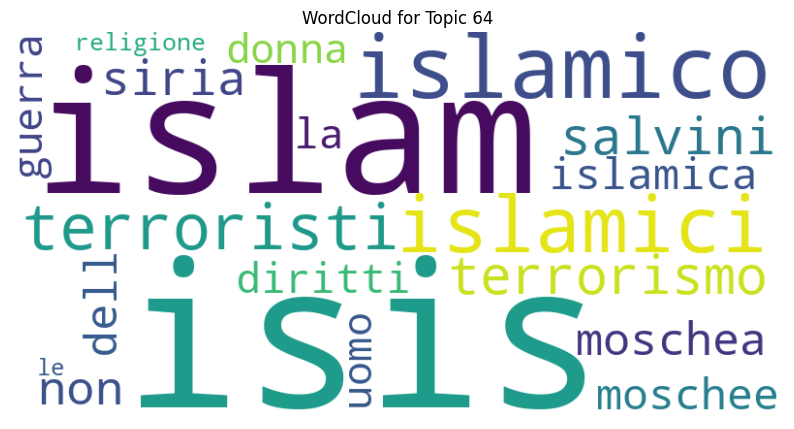

In [ ]:
top_n_words_64 = top_n_words[64]  # Replace 64 with your actual topic number

# Extract words and their TF-IDF scores
words_64 = [word for word, _ in top_n_words_64]
tfidf_scores_64 = [score for _, score in top_n_words_64]

# Create a dictionary of words with TF-IDF scores
word_dict_64 = {word: score for word, score in zip(words_64, tfidf_scores_64)}

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict_64)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Topic 64')
plt.savefig('wordcloud_topic_64.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
top_n_words[81][:20]  #81 is the 15th most common topic and it’s about LANDING; IMMIGRANTS LANDING ON THE COAST OF SICILY

[('sicilia', 0.12165634367544526),
 ('palermo', 0.06441088370806812),
 ('siciliani', 0.03652452155205204),
 ('clandestini', 0.024358376034227577),
 ('immigrati', 0.02432440587883211),
 ('sbarcati', 0.02417691429437417),
 ('https', 0.02165036556028998),
 ('altri', 0.020919800290216912),
 ('catania', 0.020013956799950914),
 ('la', 0.01865723210520069),
 ('il', 0.01744646202148559),
 ('della', 0.01742320349763493),
 ('pic', 0.016893325437221596),
 ('twitter', 0.016716902030467322),
 ('com', 0.01654186179319187),
 ('messina', 0.01628691258050976),
 ('musumeci', 0.016158078753614365),
 ('sbarchi', 0.015607983190852428),
 ('arrivo', 0.014721490377185403),
 ('al', 0.014474021279388242)]

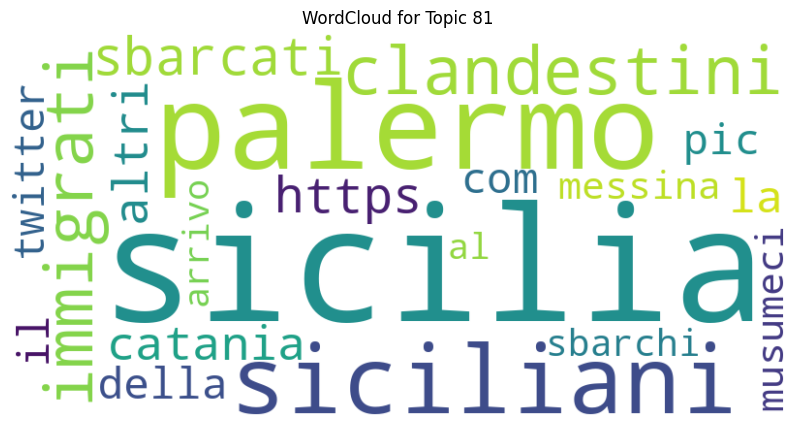

In [ ]:
top_n_words_81 = top_n_words[81]  # Replace 81 with your actual topic number

# Extract words and their TF-IDF scores
words_81 = [word for word, _ in top_n_words_81]
tfidf_scores_81 = [score for _, score in top_n_words_81]

# Create a dictionary of words with TF-IDF scores
word_dict_81 = {word: score for word, score in zip(words_81, tfidf_scores_81)}

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict_81)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Topic 81')
plt.savefig('wordcloud_topic_81.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
top_n_words[123][:20]   #elevant_tweets_ topic 123 is the 20th most frequent topic ant it’s about ONG, Boats and Immigrants 

[('libia', 0.08544460665867942),
 ('ong', 0.04804514654665211),
 ('nave', 0.0472218185220343),
 ('immigrati', 0.03894564708213078),
 ('libica', 0.03200932045356285),
 ('bordo', 0.025978697897481532),
 ('libiche', 0.02498405823128412),
 ('costiera', 0.024817279931147844),
 ('navi', 0.023978398958152874),
 ('spagnola', 0.02334089388403205),
 ('acque', 0.02320981039875998),
 ('italia', 0.02275768707586649),
 ('la', 0.02169274174367166),
 ('tripoli', 0.021473295986261486),
 ('giorni', 0.02135994096794921),
 ('guardia', 0.02117359985437364),
 ('pescatori', 0.020311254749124857),
 ('porto', 0.019598450445887847),
 ('porti', 0.01918564426061409),
 ('spagna', 0.017608766110141876)]

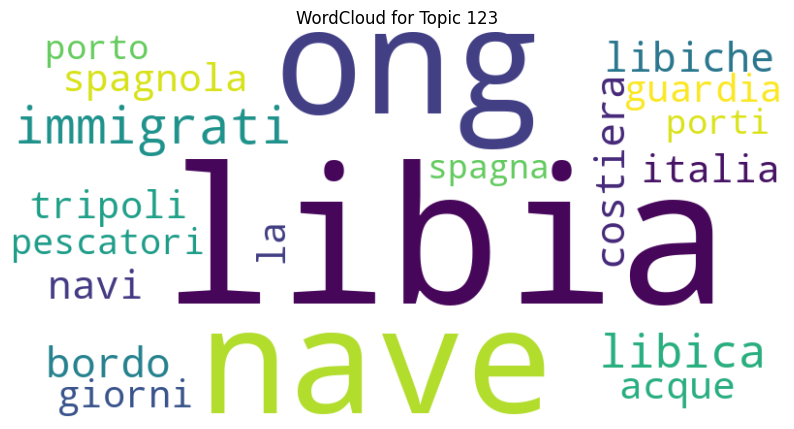

In [ ]:
top_n_words_123 = top_n_words[123]  # Replace 123 with your actual topic number

# Extract words and their TF-IDF scores
words_123 = [word for word, _ in top_n_words_123]
tfidf_scores_123 = [score for _, score in top_n_words_123]

# Create a dictionary of words with TF-IDF scores
word_dict_123 = {word: score for word, score in zip(words_123, tfidf_scores_123)}

# Generate the WordCloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_dict_123)

# Plot the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('WordCloud for Topic 123')
plt.savefig('wordcloud_topic_123.png', dpi=300, bbox_inches='tight')
plt.show()

# Ok so important topics for us are 122 (3rd most frequent topic - immigrati, immigrazione, profughi), il 64 (13esimo topic - isis, islam, terroristi), 81 (15esimo - sicilia, clandestini, sbarchi), 123 (20esimo - ONG, nave, immigrati)

In [ ]:
# Extract all the tweets in a topic

def extract_topic_tweets(df, topic_id):
    topic_tweets = df[df['Topic'] == topic_id]
    return topic_tweets


In [ ]:
#tweets in topic 122

topic_122 = extract_topic_tweets(docs_df, 122)  # here docs_df is the dataframe containing all the tweets and their topics

topic_122

file_name = '_'.join([word[0] for word in top_n_words[122][:5]]) + '.csv'
topic_122.to_csv(file_name, index=False)ant 

In [ ]:
len(topic_122)

816

In [ ]:
topic_64 = extract_topic_tweets(docs_df, 64)  # here docs_df is the dataframe containing all the tweets and their topics

topic_64

file_name = '_'.join([word[0] for word in top_n_words[64][:5]]) + '.csv'
topic_64.to_csv(file_name, index=False)



In [ ]:
len(topic_64)

279

In [ ]:
topic_81 = extract_topic_tweets(docs_df, 81)  # here docs_df is the dataframe containing all the tweets and their topics

topic_81

file_name = '_'.join([word[0] for word in top_n_words[81][:5]]) + '.csv'
topic_81.to_csv(file_name, index=False)


In [ ]:
topic_123 = extract_topic_tweets(docs_df, 123)  # here docs_df is the dataframe containing all the tweets and their topics  

topic_123

file_name = '_'.join([word[0] for word in top_n_words[123][:5]]) + '.csv'
topic_123.to_csv(file_name, index=False)



In [ ]:
# file with all the tweets for all the 4 topics (122, 64, 81, 123)

all_topics = pd.concat([topic_122, topic_64, topic_81, topic_123])

all_topics

all_topics.to_csv('all_topics.csv', index=False)


In [ ]:
len(topic_122) + len(topic_64) + len(topic_81) + len(topic_123)

1539

In [ ]:
df = pd.read_csv('tweets.csv')
df

,tweet
0,"Il “governo ammucchiata”, tutti insieme con PD..."
1,".@VittorioSgarbi: ""Verrà un tempo in cui Conte..."
2,🇮🇹🇮🇹🇮🇹 https://t.co/OO047uCKTN
3,"Un commosso addio a Roberto Brivio, artista in..."
4,Fiducia in questo Parlamento? NO Fiducia negli...
...,...
46419,Al mercato di via Ettore Ponti http://yfrog....
46420,Sl mercato di via de Guarnieri Milano...
46421,al mercato di via Osoppo a Milano. Se volete r...
46422,www.immaginami.it


In [ ]:
import re
import spacy
import it_core_news_sm

import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
from feel_it import EmotionClassifier, SentimentClassifier

In [ ]:
!pip install stop-words
from stop_words import get_stop_words
italian_stop_words = get_stop_words('italian')


[notice] A new release of pip is available: 23.2.1 -> 24.1.2
[notice] To update, run: pip install --upgrade pip


In [ ]:
nlp = spacy.load("it_core_news_sm")
#tokenized_tweets = []
#for tweet in df['tweet']:
#    doc = nlp(tweet)
#    tokenized_tweet = [token.text.lower() for token in doc if token.is_alpha and not token.is_stop and not token.is_punct]
#    tokenized_tweets.append(tokenized_tweet)

# Tokenize the tweets with hashtags
tokenized_tweets = []
for tweet in df['tweet']:
    doc = nlp(tweet)
    tokenized_tweet = [token.text.lower() for token in doc if token.is_alpha and token.text.lower() not in italian_stop_words and not token.is_punct]
    tokenized_tweets.append(tokenized_tweet)


#now i need a list of all the tokens in the tweets

all_tokens = []
for tweet in tokenized_tweets:
    for token in tweet:
        all_tokens.append(token)

        

In [ ]:
#Here we create a dictionary with the frequency of each token and visualize the 20 most common tokens

FreqDict = Counter(all_tokens)    # italiani, immigrati, immigrazione, clandestini, sbarchi, primagliitaliani
FreqDict.most_common(150)

[('salvini', 16745),
 ('lega', 5769),
 ('italia', 4272),
 ('italiani', 3915),
 ('governo', 3422),
 ('amici', 3096),
 ('live', 2554),
 ('oggi', 2379),
 ('grazie', 2324),
 ('diretta', 2155),
 ('ore', 2117),
 ('renzi', 2071),
 ('ora', 2065),
 ('anni', 1824),
 ('solo', 1817),
 ('lavoro', 1795),
 ('pd', 1740),
 ('europa', 1665),
 ('fa', 1547),
 ('casa', 1531),
 ('portaaporta', 1485),
 ('paese', 1469),
 ('prima', 1428),
 ('sempre', 1301),
 ('stato', 1297),
 ('immigrati', 1281),
 ('roma', 1260),
 ('sinistra', 1243),
 ('piazza', 1233),
 ('milano', 1213),
 ('euro', 1204),
 ('dopo', 1195),
 ('essere', 1171),
 ('domenica', 1164),
 ('bene', 1126),
 ('sicurezza', 1094),
 ('fatto', 1067),
 ('clandestini', 1064),
 ('poi', 1056),
 ('cittadini', 1047),
 ('milioni', 1014),
 ('tasse', 1009),
 ('meno', 1003),
 ('tutta', 984),
 ('via', 981),
 ('domani', 975),
 ('ministro', 972),
 ('onda', 955),
 ('mai', 946),
 ('può', 945),
 ('qualcuno', 935),
 ('cosa', 934),
 ('legge', 918),
 ('avanti', 907),
 ('immigrazi

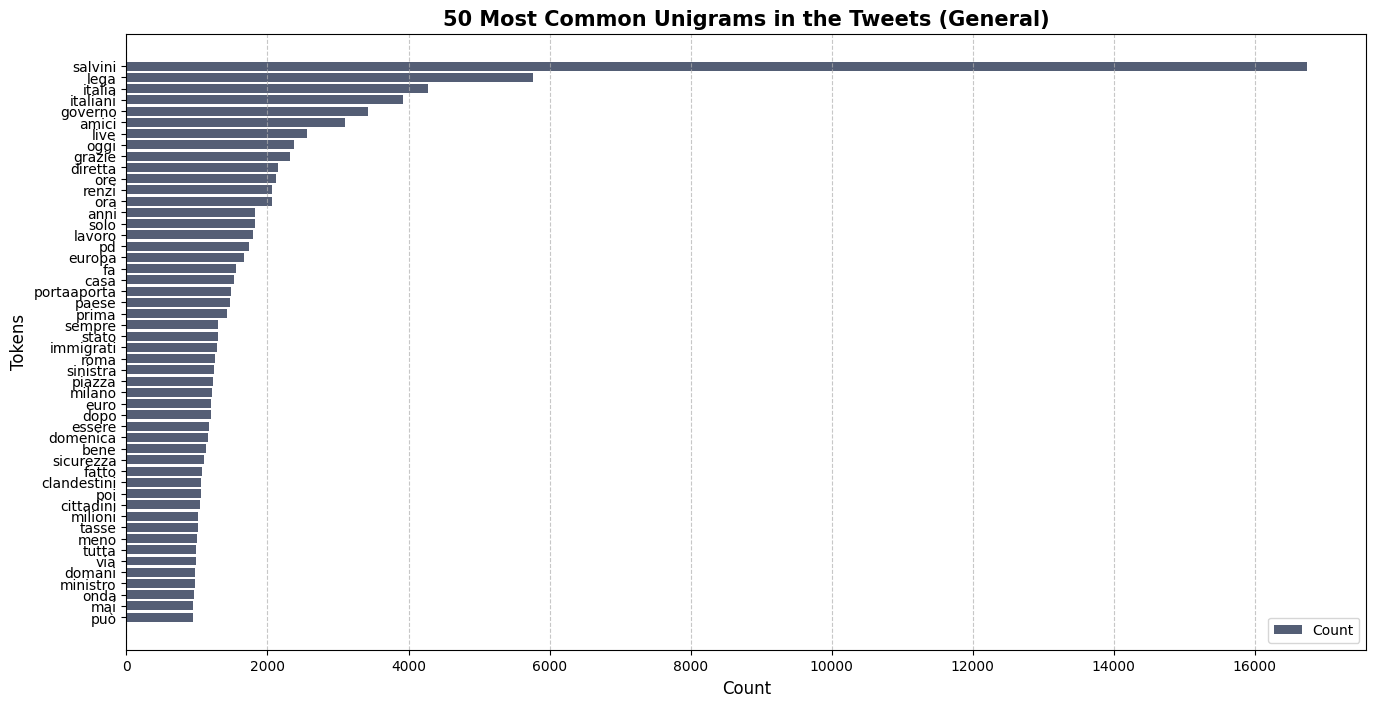

In [ ]:
# Create a graph with the 50 most common tokens on the y-axis and the frequency count on the x-axis

# Extract the 50 most common tokens
most_common_tokens = FreqDict.most_common(50)

# Extract words and their frequencies
words = [word for word, _ in most_common_tokens]
frequencies = [freq for _, freq in most_common_tokens]

# Reverse the order of words and frequencies
words.reverse()
frequencies.reverse()

# Plot the 50 most common tokens
plt.figure(figsize=(16, 8))
plt.barh(words, frequencies, color='#545E75')  # Horizontal bar chart
plt.title('50 Most Common Unigrams in the Tweets (General)', fontsize=15, weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Tokens', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(['Count'])  # Add a legend
plt.savefig('50_most_common_unigrams_general.png', dpi=300, bbox_inches='tight')
plt.show()




In [ ]:
# Extract bigrams and trigrams
bigrams = list(zip(all_tokens, all_tokens[1:]))
trigrams = list(zip(all_tokens, all_tokens[1:], all_tokens[2:]))

# Calculate frequencies
bigram_freq = Counter(bigrams)
trigram_freq = Counter(trigrams)

In [ ]:
#the 10 most frequent bigrams

bigram_freq.most_common(100)  # immigrazione clandestina, prima italiani, primagliitaliani salvini, 

[(('salvini', 'lega'), 1481),
 (('portaaporta', 'salvini'), 1082),
 (('ore', 'trasmissione'), 587),
 (('ottoemezzo', 'salvini'), 574),
 (('trasmissione', 'tv'), 529),
 (('tv', 'onda'), 522),
 (('forze', 'ordine'), 501),
 (('ora', 'diretta'), 411),
 (('tutta', 'italia'), 341),
 (('milioni', 'italiani'), 330),
 (('quartarepubblica', 'salvini'), 325),
 (('dimartedi', 'salvini'), 323),
 (('lega', 'salvini'), 320),
 (('legge', 'fornero'), 293),
 (('quintacolonna', 'salvini'), 277),
 (('ore', 'incontro'), 277),
 (('domenica', 'ore'), 264),
 (('buongiorno', 'amici'), 258),
 (('roba', 'matti'), 256),
 (('donne', 'uomini'), 247),
 (('salvini', 'renzi'), 245),
 (('video', 'completo'), 244),
 (('nonelarena', 'salvini'), 243),
 (('nonstopnews', 'salvini'), 242),
 (('salvini', 'italia'), 241),
 (('avanti', 'tutta'), 241),
 (('iovotono', 'salvini'), 241),
 (('fuoridalcoro', 'salvini'), 238),
 (('immigrazione', 'clandestina'), 236),
 (('venerdì', 'ore'), 233),
 (('centri', 'sociali'), 232),
 (('incon

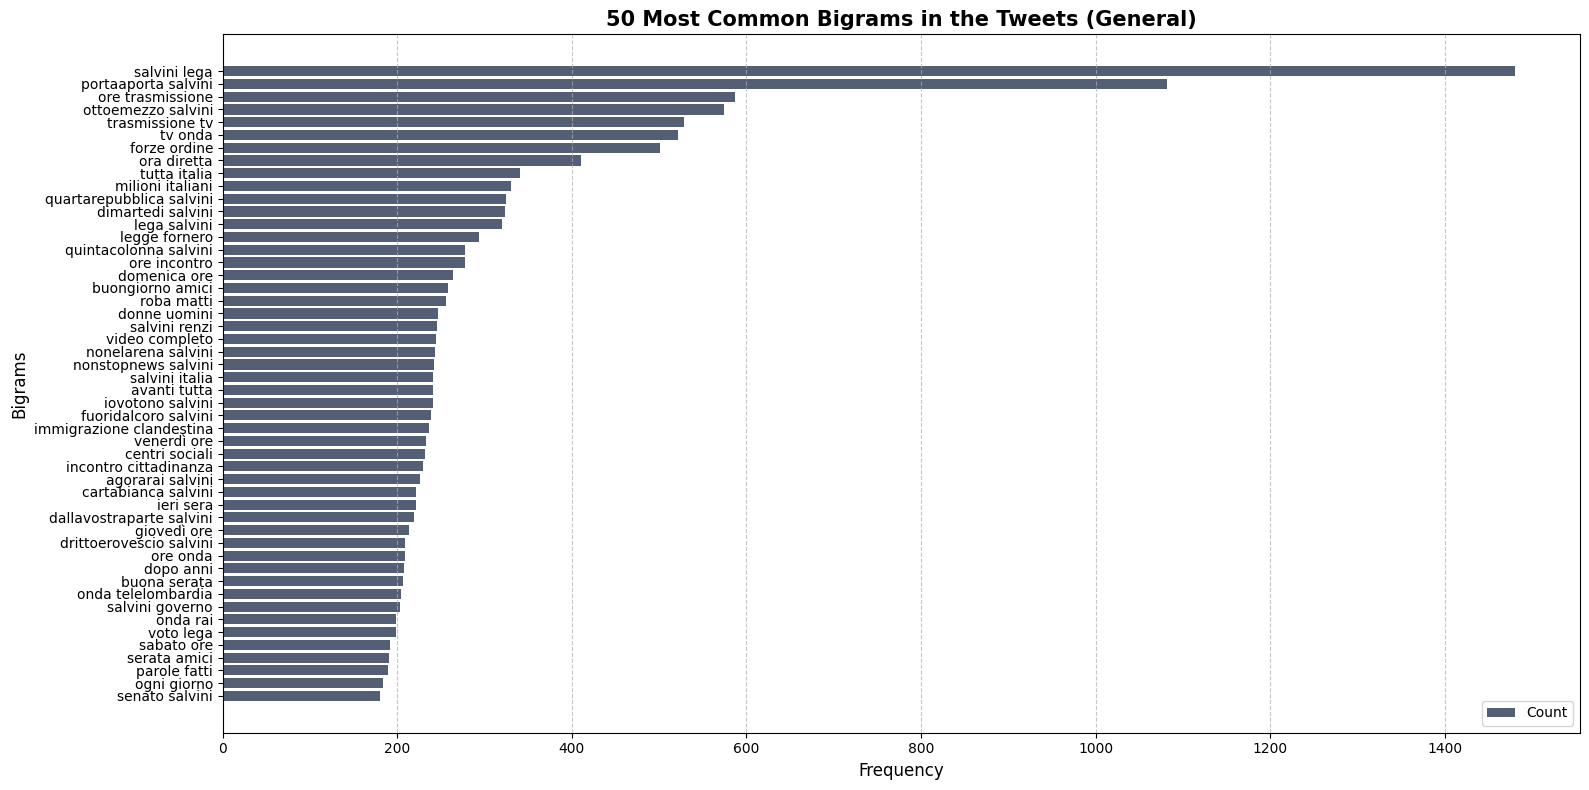

In [ ]:
# Extract bigram words and their frequencies"""

bigram_words = [f"{word1} {word2}" for (word1, word2), freq in bigram_freq.most_common(50)]
bigram_frequencies = [freq for (_, _), freq in bigram_freq.most_common(50)]

bigram_words.reverse()
bigram_frequencies.reverse()

# Plot the 50 most common bigrams

plt.figure(figsize=(16, 8))
plt.barh(bigram_words, bigram_frequencies, color='#545E75')  # Horizontal bar chart
plt.title('50 Most Common Bigrams in the Tweets (General)', fontsize=15, weight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bigrams', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(['Count'])  # Add a legend
plt.tight_layout()  # Add padding between the plot and the labels
plt.savefig('50_most_common_bigrams_general.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
# 10 most frequent trigrams

trigram_freq.most_common(100)  # business immigrazione clandestina, reato immigrazione clandestina, campo profughi europa



[(('ore', 'trasmissione', 'tv'), 527),
 (('trasmissione', 'tv', 'onda'), 520),
 (('ore', 'incontro', 'cittadinanza'), 205),
 (('buona', 'serata', 'amici'), 181),
 (('stavolta', 'voto', 'lega'), 151),
 (('tv', 'onda', 'telelombardia'), 147),
 (('voto', 'lega', 'salvini'), 142),
 (('venerdì', 'ore', 'trasmissione'), 140),
 (('notte', 'serena', 'amici'), 118),
 (('lunedì', 'ore', 'trasmissione'), 114),
 (('telelombardia', 'orario', 'continuato'), 113),
 (('telelombardia', 'buongiorno', 'lombardia'), 108),
 (('buona', 'giornata', 'amici'), 107),
 (('giovedì', 'ore', 'trasmissione'), 103),
 (('onda', 'telelombardia', 'buongiorno'), 99),
 (('mercoledì', 'ore', 'trasmissione'), 98),
 (('buona', 'domenica', 'amici'), 97),
 (('tv', 'onda', 'rai'), 95),
 (('buon', 'pomeriggio', 'amici'), 94),
 (('donne', 'uomini', 'divisa'), 84),
 (('ore', 'festa', 'ln'), 83),
 (('onda', 'telelombardia', 'orario'), 81),
 (('grazie', 'forze', 'ordine'), 79),
 (('domenica', 'ore', 'votare'), 79),
 (('ore', 'votare

KeyboardInterrupt: 

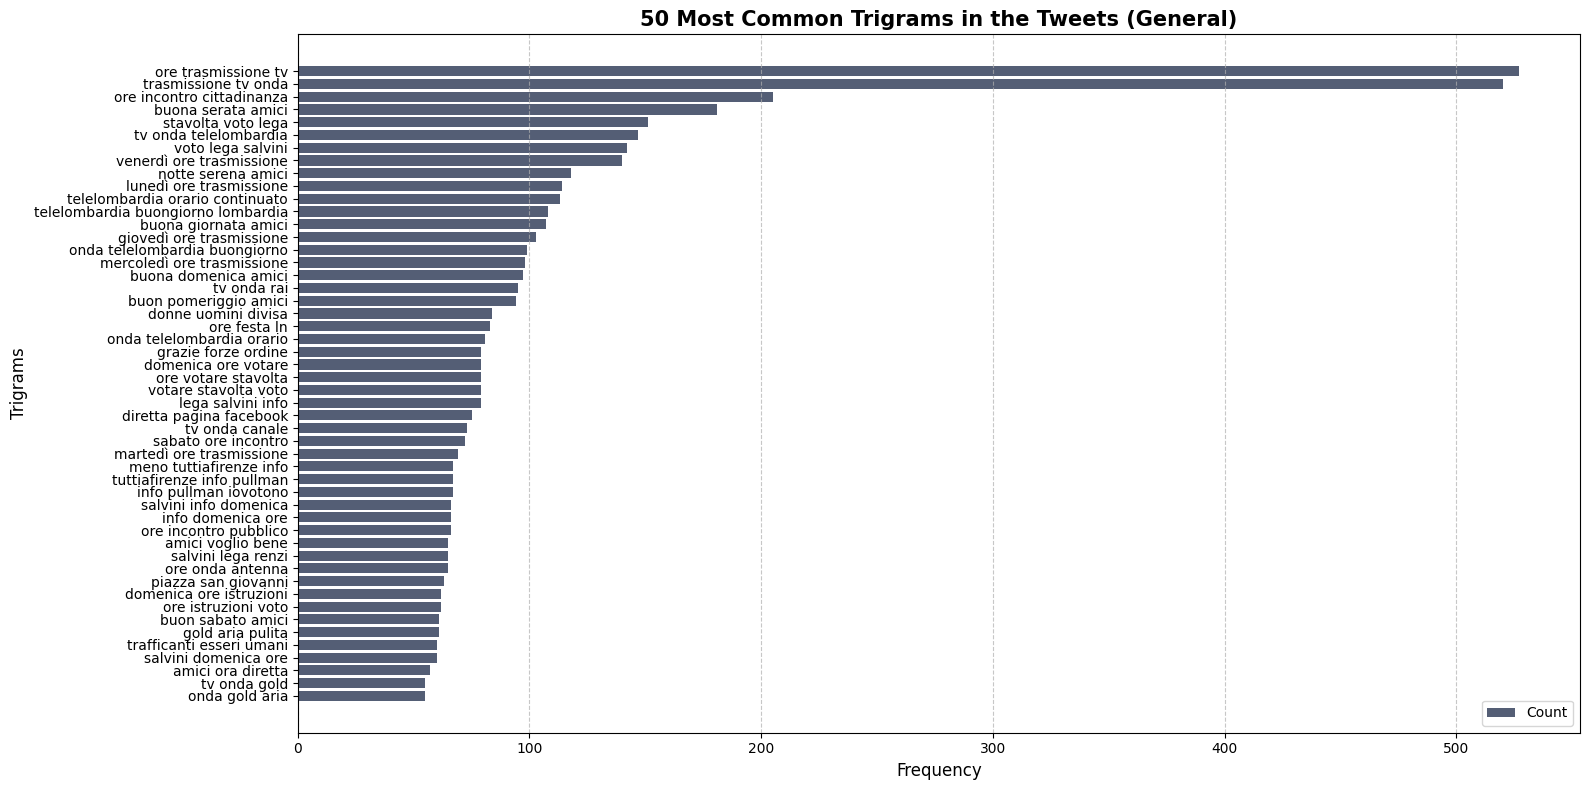

In [ ]:
# Extract trigram words and their frequencies
trigram_words = [f"{word1} {word2} {word3}" for (word1, word2, word3), freq in trigram_freq.most_common(50)]
trigram_frequencies = [freq for (_, _, _), freq in trigram_freq.most_common(50)]

trigram_words.reverse()
trigram_frequencies.reverse()

# Plot the 50 most common trigrams
plt.figure(figsize=(16, 8))
plt.barh(trigram_words, trigram_frequencies, color='#545E75')  # Horizontal bar chart
plt.title('50 Most Common Trigrams in the Tweets (General)', fontsize=15, weight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Trigrams', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(['Count'])  # Add a legend
plt.tight_layout()  # Add padding between the plot and the labels
plt.savefig('50_most_common_trigrams_general.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
topic_123 = pd.read_csv('libia_ong_nave_immigrati_libica.csv')
topic_123

,Doc,Topic,Doc_ID
0,La testimonianza di uno dei nostri pescatori r...,123,458
1,Se i #pescatori italiani sequestrati in Libia ...,123,512
2,Invece di occuparsi dei 18 pescatori sequestra...,123,590
3,"Libia, turchi liberati in 5 giorni, i nostri p...",123,603
4,"Turchi liberati dopo 5 giorni, i nostri pescat...",123,613
...,...,...,...
188,L'intervento in Libia ha peggiorato la situazi...,123,37493
189,"Sul Corriere denuncia di Tripoli: ""Sbarchi dal...",123,37763
190,Altri 556 immigrati raccolti da navi militari ...,123,38238
191,Le cosche guadagnano sugli #immigrati: marina ...,123,38256


In [ ]:
topic_213 = pd.read_csv('italiani_governo_gli_italia_salvini.csv')
topic_213

,Doc,Topic,Doc_ID
0,"Il “governo ammucchiata”, tutti insieme con PD...",213,0
1,Conte ha detto che deve rimanere al governo pe...,213,94
2,#Salvini: Se Conte ha i numeri per andare avan...,213,122
3,Ultimo sondaggio: il 54% degli italiani chiede...,213,155
4,"#CRISIDIGOVERNO, NOTA CONGIUNTA DEL CENTRODEST...",213,169
...,...,...,...
140,"#Renzi: ""L'Italia sta vivendo un periodo di ri...",213,37772
141,Se Forza Italia continuerà a votare riforme PE...,213,37909
142,In Italia la #Democrazia è a rischio. Esagero?...,213,39932
143,A #lagabbia @comilara dice che l'Italia è fess...,213,41127


# Let’s check now the most frequent bigrams and trigrams in our relevant tweets (those who are in the topics)

In [ ]:
relevant_tweets = pd.read_csv('all_topics.csv')

relevant_tweets


,Doc,Topic,Doc_ID
0,Centinaia di italiani che vivono e lavorano a ...,122,463
1,Il governo ha bloccato il Parlamento per aprir...,122,728
2,⚠️Divieto di spostamento tra regioni dal 20 di...,122,858
3,#Salvini: Ancora troppi gli italiani dimentica...,122,1057
4,Vedendo quanto sta accadendo ora grazie a Cont...,122,1068
...,...,...,...
1534,L'intervento in Libia ha peggiorato la situazi...,123,37493
1535,"Sul Corriere denuncia di Tripoli: ""Sbarchi dal...",123,37763
1536,Altri 556 immigrati raccolti da navi militari ...,123,38238
1537,Le cosche guadagnano sugli #immigrati: marina ...,123,38256


In [ ]:
tokenized_relevant_tweets = []
for tweet in relevant_tweets['Doc']:
    doc = nlp(tweet)
    tokenized_relevant_tweet = [token.text.lower() for token in doc if token.is_alpha and token.text.lower() not in italian_stop_words and not token.is_punct]
    tokenized_relevant_tweets.append(tokenized_relevant_tweet)



#list of all the tokens in the tweets

all_tokens_relevant = []
for tweet in tokenized_relevant_tweets:
    for token in tweet:
        all_tokens_relevant.append(token)

In [ ]:
FreqDict_relevant = Counter(all_tokens_relevant)
FreqDict_relevant.most_common(20)

[('salvini', 715),
 ('immigrati', 416),
 ('immigrazione', 336),
 ('italia', 227),
 ('italiani', 206),
 ('lega', 150),
 ('sicilia', 141),
 ('profughi', 135),
 ('clandestini', 131),
 ('governo', 130),
 ('clandestina', 101),
 ('solo', 100),
 ('casa', 92),
 ('libia', 90),
 ('ong', 81),
 ('isis', 74),
 ('pd', 73),
 ('oggi', 73),
 ('nave', 72),
 ('palermo', 68)]

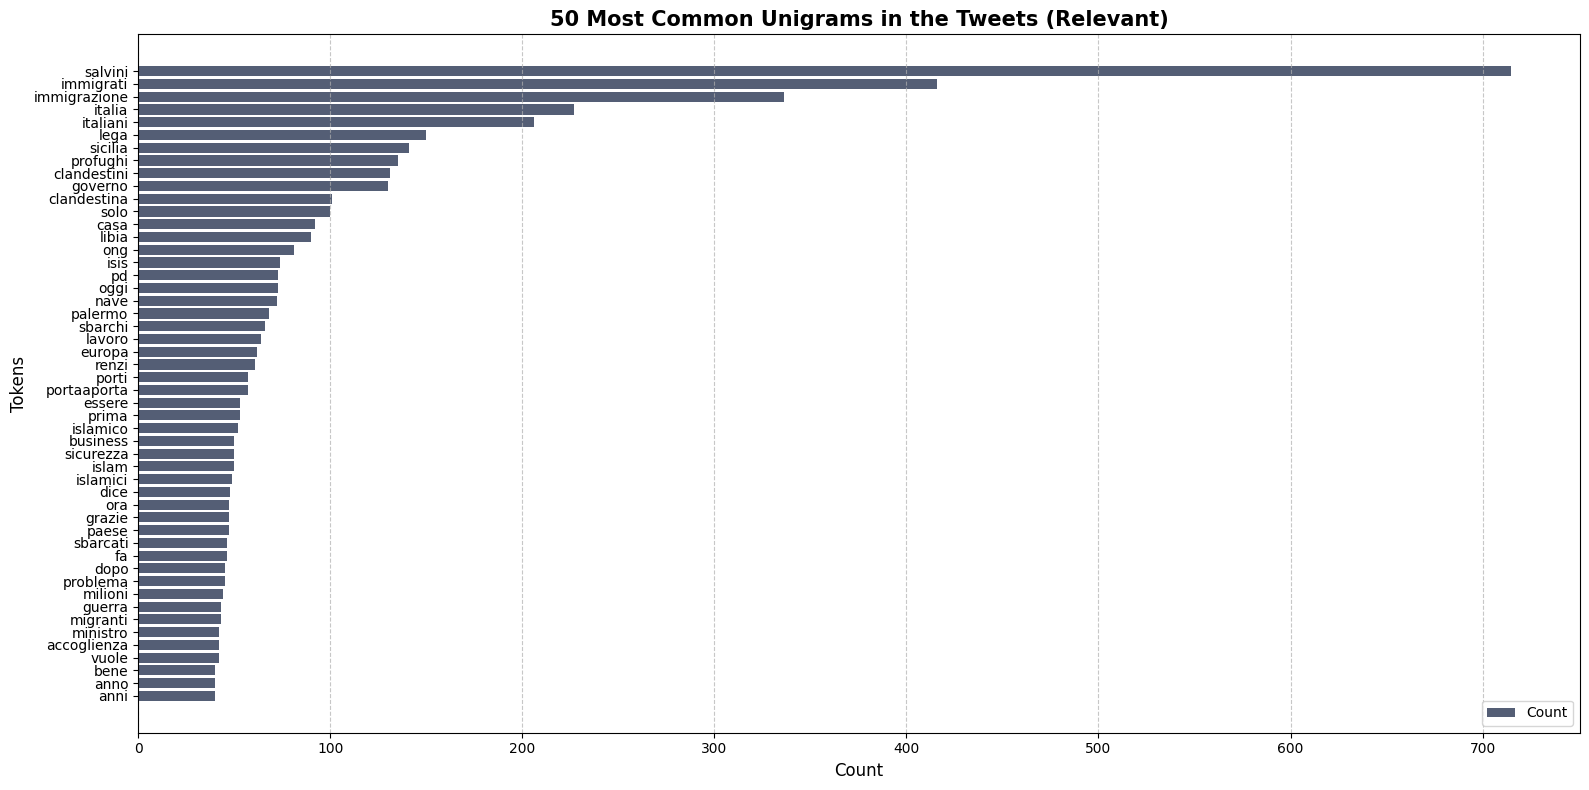

In [ ]:
# Extract the 50 most common tokens
most_common_tokens_relevant = FreqDict_relevant.most_common(50)

# Extract words and their frequencies
words_relevant = [word for word, _ in most_common_tokens_relevant]
frequencies_relevant = [freq for _, freq in most_common_tokens_relevant]

# Reverse the order of words and frequencies
words_relevant.reverse()
frequencies_relevant.reverse()

# Plot the 50 most common tokens
plt.figure(figsize=(16, 8))
plt.barh(words_relevant, frequencies_relevant, color='#545E75')  # Horizontal bar chart
plt.title('50 Most Common Unigrams in the Tweets (Relevant)', fontsize=15, weight='bold')
plt.xlabel('Count', fontsize=12)
plt.ylabel('Tokens', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(['Count'])  # Add a legend
plt.tight_layout()
plt.savefig('50_most_common_unigrams_relevant.png', dpi=300, bbox_inches='tight')
plt.show()


In [ ]:
bigrams_relevant = list(zip(all_tokens_relevant, all_tokens_relevant[1:]))
trigrams_relevant = list(zip(all_tokens_relevant, all_tokens_relevant[1:], all_tokens_relevant[2:]))

# Calculate frequencies
bigram_freq_relevant = Counter(bigrams_relevant)
trigram_freq_relevant = Counter(trigrams_relevant)

In [ ]:
bigram_freq_relevant.most_common(100) 

[(('immigrazione', 'clandestina'), 97),
 (('salvini', 'lega'), 69),
 (('salvini', 'immigrazione'), 46),
 (('immigrati', 'regolari'), 34),
 (('business', 'immigrazione'), 30),
 (('portaaporta', 'salvini'), 28),
 (('nave', 'ong'), 25),
 (('immigrati', 'clandestini'), 24),
 (('campo', 'profughi'), 24),
 (('presunti', 'profughi'), 24),
 (('esseri', 'umani'), 22),
 (('terrorismo', 'islamico'), 21),
 (('salvini', 'immigrati'), 20),
 (('guardia', 'costiera'), 19),
 (('immigrati', 'bordo'), 18),
 (('reato', 'immigrazione'), 18),
 (('quintacolonna', 'salvini'), 18),
 (('costiera', 'libica'), 18),
 (('fuori', 'controllo'), 17),
 (('milioni', 'italiani'), 17),
 (('salvini', 'salvini'), 17),
 (('richiedenti', 'asilo'), 16),
 (('ottoemezzo', 'salvini'), 16),
 (('dallavostraparte', 'salvini'), 16),
 (('profughi', 'europa'), 15),
 (('ballarò', 'salvini'), 15),
 (('terroristi', 'islamici'), 15),
 (('porti', 'italiani'), 14),
 (('salvini', 'italia'), 14),
 (('ministro', 'interno'), 13),
 (('migliaia', 

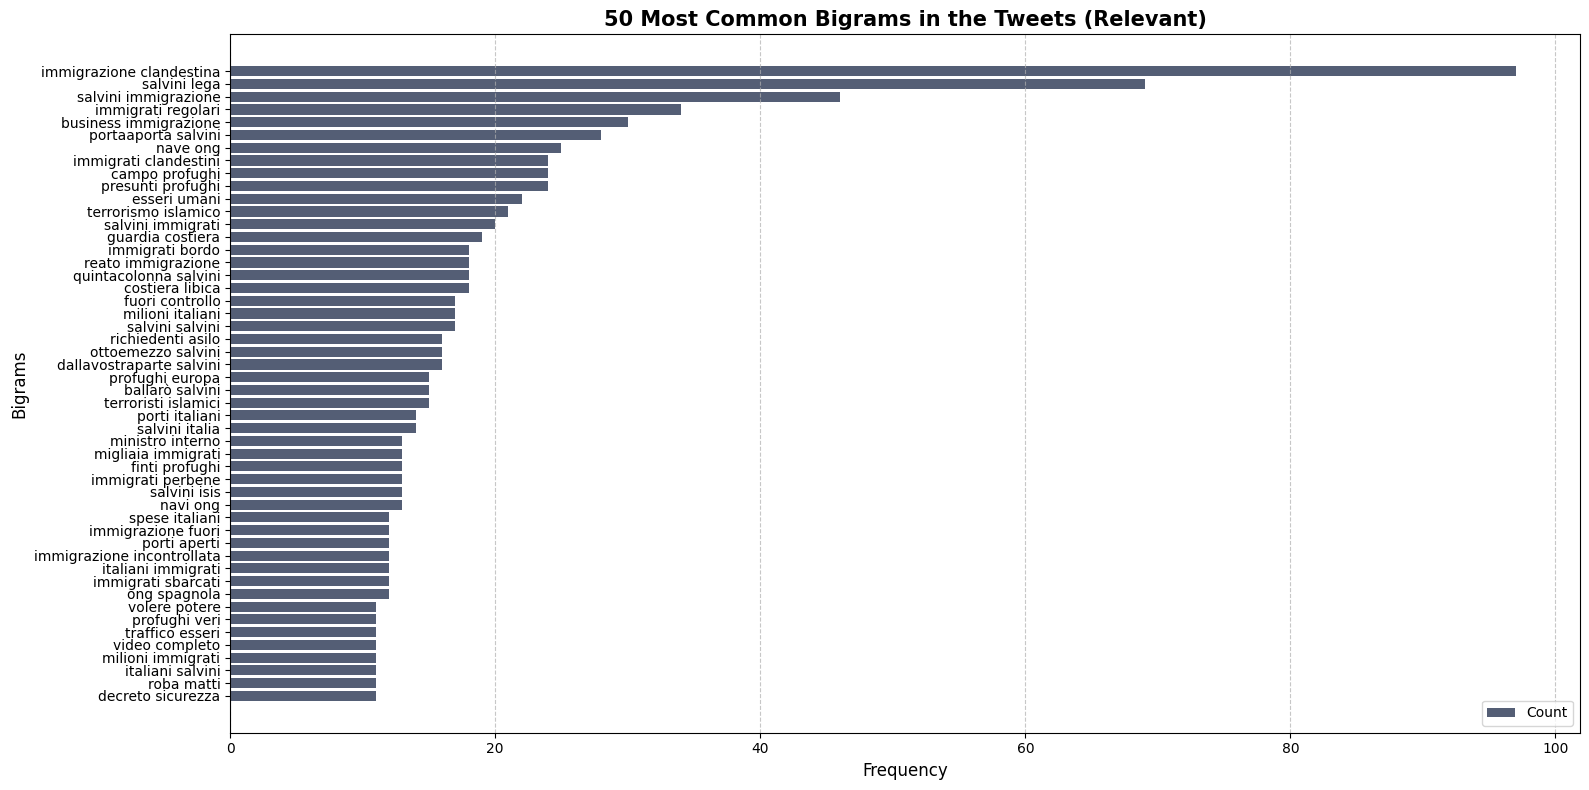

In [ ]:
# Extract bigram words and their frequencies"""

bigram_words_rel = [f"{word1} {word2}" for (word1, word2), freq in bigram_freq_relevant.most_common(50)]
bigram_frequencies_rel = [freq for (_, _), freq in bigram_freq_relevant.most_common(50)]

bigram_words_rel.reverse()
bigram_frequencies_rel.reverse()

# Plot the 50 most common bigrams

plt.figure(figsize=(16, 8))
plt.barh(bigram_words_rel, bigram_frequencies_rel, color='#545E75')  # Horizontal bar chart
plt.title('50 Most Common Bigrams in the Tweets (Relevant)', fontsize=15, weight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Bigrams', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(['Count'])  # Add a legend
plt.tight_layout()  # Add padding between the plot and the labels
plt.savefig('50_most_common_bigrams_relevant.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
trigram_freq_relevant.most_common(100)

[(('business', 'immigrazione', 'clandestina'), 23),
 (('reato', 'immigrazione', 'clandestina'), 18),
 (('guardia', 'costiera', 'libica'), 18),
 (('campo', 'profughi', 'europa'), 15),
 (('immigrazione', 'fuori', 'controllo'), 12),
 (('traffico', 'esseri', 'umani'), 11),
 (('trafficanti', 'esseri', 'umani'), 10),
 (('mandano', 'figli', 'scuola'), 9),
 (('immigrati', 'regolari', 'perbene'), 8),
 (('italiani', 'immigrati', 'regolari'), 8),
 (('favoreggiamento', 'immigrazione', 'clandestina'), 7),
 (('pagano', 'tasse', 'mandano'), 7),
 (('decreto', 'sicurezza', 'immigrazione'), 7),
 (('donna', 'vale', 'meno'), 7),
 (('vale', 'meno', 'uomo'), 7),
 (('italia', 'campo', 'profughi'), 6),
 (('salvini', 'immigrazione', 'incontrollata'), 6),
 (('essere', 'campo', 'profughi'), 6),
 (('tasse', 'mandano', 'figli'), 6),
 (('salvini', 'immigrazione', 'clandestina'), 6),
 (('tanti', 'immigrati', 'regolari'), 5),
 (('immigrati', 'regolari', 'integrati'), 5),
 (('milioni', 'immigrati', 'regolari'), 5),
 (

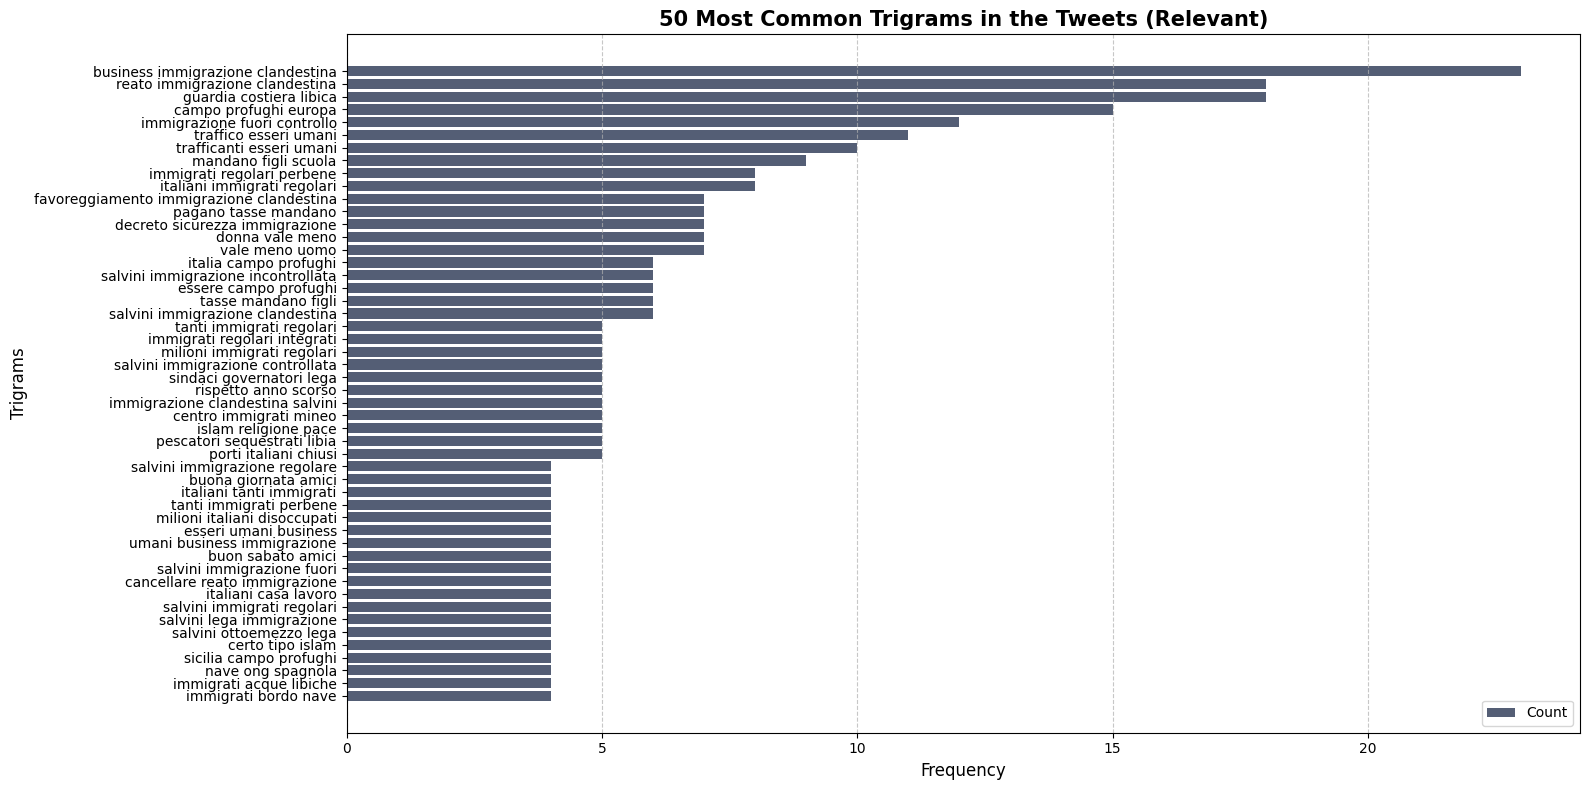

In [ ]:
# Extract trigram words and their frequencies
trigram_words_rel = [f"{word1} {word2} {word3}" for (word1, word2, word3), freq in trigram_freq_relevant.most_common(50)]
trigram_frequencies_rel = [freq for (_, _, _), freq in trigram_freq_relevant.most_common(50)]

trigram_words_rel.reverse()
trigram_frequencies_rel.reverse()

# Plot the 50 most common trigrams
plt.figure(figsize=(16, 8))
plt.barh(trigram_words_rel, trigram_frequencies_rel, color='#545E75')  # Horizontal bar chart
plt.title('50 Most Common Trigrams in the Tweets (Relevant)', fontsize=15, weight='bold')
plt.xlabel('Frequency', fontsize=12)
plt.ylabel('Trigrams', fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.7)  # Add grid for better readability
plt.legend(['Count'])  # Add a legend
plt.tight_layout()  # Add padding between the plot and the labels
plt.savefig('50_most_common_trigrams_relevant.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
emotion_classifier = EmotionClassifier()
sentiment_classifier = SentimentClassifier()

In [ ]:
#here we create a dictionary with the sentiment and emotion of each relevant tweet by fitting the model to the relevant tweets and storing the predictions in a dictionary that looks like this: {tweet: {"sentiment": sentiment, "emotion": emotion}}

sentiment_emotion_dict = {}
for tweet in relevant_tweets['Doc']:
    sentiment_emotion_dict[tweet] = {"sentiment": sentiment_classifier.predict([tweet])[0], "emotion": emotion_classifier.predict([tweet])[0]}

In [ ]:
#print the dictionary as a dataframe
df = pd.DataFrame(sentiment_emotion_dict).T
df.head(10)

,sentiment,emotion
"Centinaia di italiani che vivono e lavorano a Londra e nel Regno Unito, dopo aver fatto costosi tamponi, sono stati bloccati e abbandonati mentre erano già in aeroporto, con carta d'imbarco in mano e in attesa del volo. (1/2) https://t.co/M9y2PDPm9C",negative,sadness
"Il governo ha bloccato il Parlamento per aprire porti e riaccendere il business dell’immigrazione clandestina, ma non trova il tempo per i più di 20mila giovani medici che da metà ottobre attendono di sapere dove potranno iniziare la specializzazione.",negative,sadness
"⚠️Divieto di spostamento tra regioni dal 20 dicembre al 6 gennaio, #patrimoniale su casa e risparmi, Camera impegnata nel riaprire porti e portafogli per il business dell'immigrazione clandestina. Da Lega e centrodestra battaglia giorno e notte per fermare il #Decretoclandestini. https://t.co/h1Z5W2aWuT",negative,anger
#Salvini: Ancora troppi gli italiani dimenticati: disabili senza l'assistenza dovuta e anziani chiusi in casa. Cerchiamo di rispondere alle loro richieste di aiuto. #ore14rai2,negative,sadness
"Vedendo quanto sta accadendo ora grazie a Conte, con sbarchi senza fine, cancellazione dei Decreti sicurezza e ripartenza del business dell'immigrazione clandestina, ci vado ancor di più A TESTA ALTA!",negative,anger
"Che vergogna. Per i clandestini zona verde, grazie a questo governo la mangiatoia del business dell’immigrazione clandestina è ripartita a pieno regime. https://t.co/otaopxQoh2",negative,anger
"🔴 Quasi 30mila sbarchi, oltre 12 mila tunisini. Gli italiani in casa, bar, ristoranti e negozi chiusi. Porti e confini aperti a clandestini e finti richiedenti asilo che non fuggono da nessuna guerra. Questa è l’Italia di Conte, PD e 5 Stelle. https://t.co/kkPltZZ0mR",negative,anger
847 immigrati ieri. 114 solo questa notte. 2.241 da domenica. E la settimana prossima Pd e 5Stelle portano in Parlamento la cancellazione dei Decreti Sicurezza. Complici e incoscienti.,negative,anger
"Gli italiani non vogliono parole ma fatti. Da domenica a oggi, sono sbarcati in Italia 1.600 immigrati clandestini (nel video uno di quelli di stamattina). Di che controlli parla il Viminale? Scriveremo a “Chi l’ha Visto?” per avere notizie del ministro Lamorgese. https://t.co/d0kNsLqSn1",negative,anger
"#Salvini: Un'oretta fa sono sbarcati altri cento immigrati a #Lampedusa. Non vedo sui banchi del governo il ministro dell'Interno... Un governo che si appresta a chiudere scuole, uffici e negozi non potrebbe chiudere i porti ai clandestini? È così difficile? #Senato",negative,anger


In [ ]:
#count how many tweets have a a certain emotion
df["emotion"].value_counts()

emotion
anger      1247
sadness     118
joy         115
fear         59
Name: count, dtype: int64

In [ ]:
#percentage of tweets with a certain emotion

df["emotion"].value_counts(normalize=True)*100


emotion
anger      81.026641
sadness     7.667316
joy         7.472385
fear        3.833658
Name: proportion, dtype: float64

In [ ]:
#count how many tweets have a positive sentiment
df["sentiment"].value_counts()


sentiment
negative    1427
positive     112
Name: count, dtype: int64

In [ ]:
#percentage
df["sentiment"].value_counts(normalize=True)*100

sentiment
negative    92.722547
positive     7.277453
Name: proportion, dtype: float64

# Pie Chart for Emotions

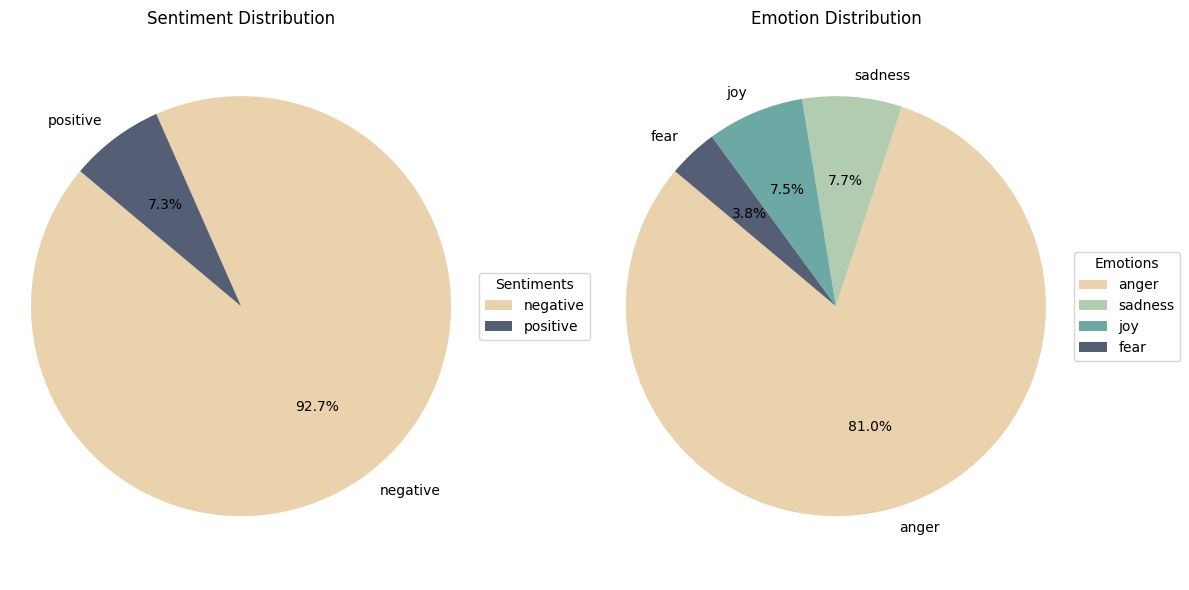

In [ ]:
import matplotlib.pyplot as plt

# Assuming you have sentiment_counts and colors defined from your original code

# Calculate percentage of each emotion
emotion_counts = df["emotion"].value_counts(normalize=True) * 100

# Set colors for emotions
colors_emotion = ['#EAD2AC', '#B2CCB2', '#6CA9A5', '#545E75']

# Plotting pie chart for sentiment distribution
plt.figure(figsize=(12, 6))  # Larger figure size to accommodate both charts
plt.subplot(1, 2, 1)  # Subplot 1 of a 1x2 grid (left side)
wedges_sentiment, _, autotexts_sentiment = plt.pie(sentiment_counts, labels=sentiment_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Sentiment Distribution')
plt.axis('equal')

# Add legend for sentiment
plt.legend(wedges_sentiment, sentiment_counts.index, title="Sentiments", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Plotting pie chart for emotion distribution
plt.subplot(1, 2, 2)  # Subplot 2 of a 1x2 grid (right side)
wedges_emotion, _, autotexts_emotion = plt.pie(emotion_counts, labels=emotion_counts.index, autopct='%1.1f%%', colors=colors_emotion, startangle=140)
plt.title('Emotion Distribution')
plt.axis('equal')

# Add legend for emotion
plt.legend(wedges_emotion, emotion_counts.index, title="Emotions", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))

# Adjust layout to prevent overlap
plt.tight_layout()

# Save the combined plot as an image
plt.savefig('sentiment_and_emotion_pie_charts_with_legends.png', dpi=300, bbox_inches='tight')

# Display the combined plot
plt.show()



In [ ]:
!pip freeze > requirements.txt